In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import torch
import torchaudio
import pandas as pd
import IPython.display as ipd

Waveform, Spectrum, Spectrogram, Mel spectrogram

# korean_wav

In [7]:
korean_wav = "/content/1_0005.wav"

korean_wav, rate = librosa.load(korean_wav, sr=16000)

In [ ]:
ipd.Audio(korean_wav, rate=rate)

## draw waveform

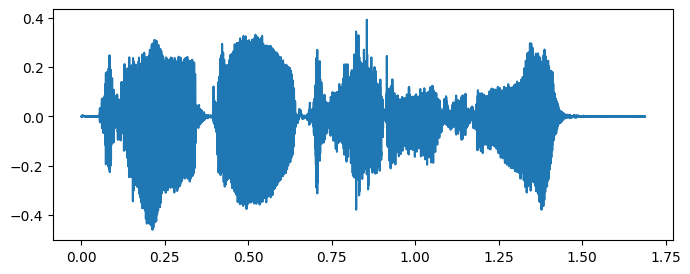

In [9]:
time = np.linspace(0, len(korean_wav)/rate, len(korean_wav))
plt.figure(figsize=(8, 3))
plt.plot(time, korean_wav)
plt.show()

## draw spectrum (fft)

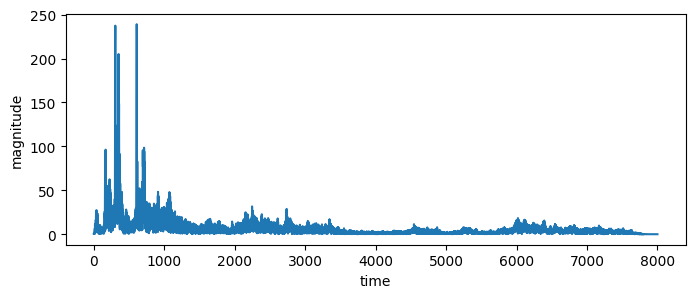

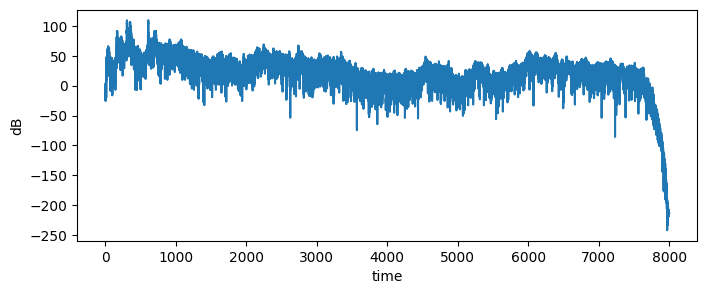

In [11]:
fft = np.fft.fft(korean_wav)
magnitude = np.abs(fft)

f = np.linspace(0, rate//2, len(magnitude)//2)
#left_spectrum = magnitude[:int(len(magnitude)/2)]
#left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(8, 3))
#plt.plot(left_f, left_spectrum)
plt.xlabel("time")
plt.ylabel("magnitude")
plt.plot(f, magnitude[:len(magnitude)//2])
plt.show()

plt.figure(figsize=(8, 3))
plt.xlabel("time")
plt.ylabel("dB")
plt.plot(f, 20 * np.log(magnitude[:len(magnitude)//2]))
plt.show()

## draw spectrogram

<h2>STFT (Short Time Fourier Transform)

----------------
전체 신호에 대해 FT하게 된다면 시간이 지남에 따라 변화하는 음성의 정보를 캐치하지 못하고 전체 신호에서 특정 주파수의 유무만 나타내게 된다.<br><br>
따라서 전체 신호를 일정한 frame으로 나누어 FT를 함으로써 변화하는 소리의 정보를 분석할 수 있게 된다.<br>
일정한 frame은 n_fft, frame 안에 존재하는 원래 신호 sample의 개수는 window length라고 한다.<br>
=> window length가 커질수록 주파수 해상도<u>(DFT했을 때의 똑똑 딴 sample들의 개수, spectrogram을 봤을 때 가로선의 폭이 좁아짐)</u>는 커지고 시간 해상도<u>(DFT하기 전 sample들 사이 간격, spectroram을 봤을 때 세로선의 폭이 좁아짐)</u>는 작아져 주파수 성분들을 더 자세하고 꼼꼼히 분석할 수 있다.

n_fft의 default값 : 2048

window length의 default값 : n_fft와 같다

hop_length의 default값 : win_length // 4 (=> 4분의 1이 overlap)

### window length = default (2048)


window length가 default인 경우 n_fft 같은 값을 가짐

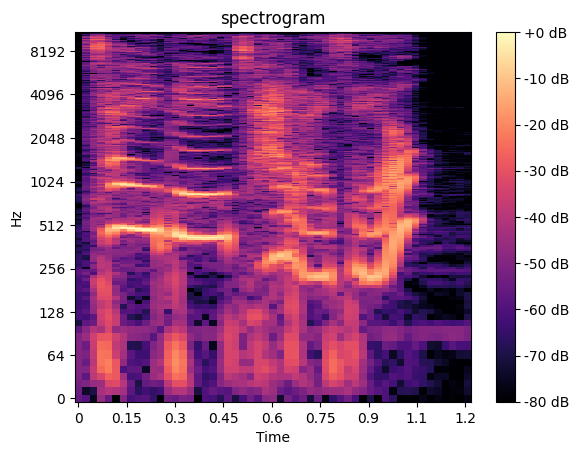

In [12]:
S = np.abs(librosa.stft(korean_wav))  # short time fourier transform
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

### win_length = 1024

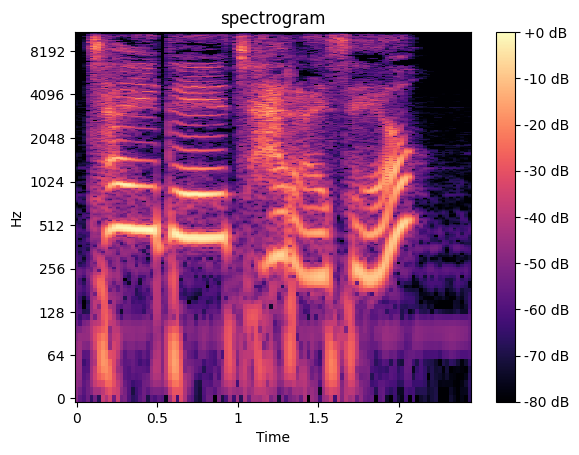

In [ ]:
S = np.abs(librosa.stft(korean_wav, win_length = 1024))  # short time fourier transform
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

### win_length = 512

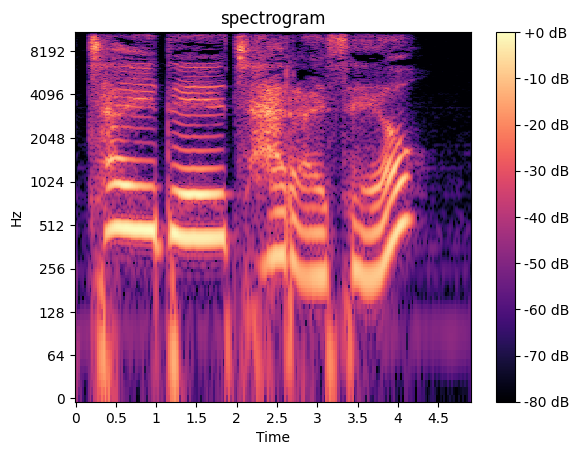

In [ ]:
S = np.abs(librosa.stft(korean_wav, win_length = 512))  # short time fourier transform
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

### mel spectrogram

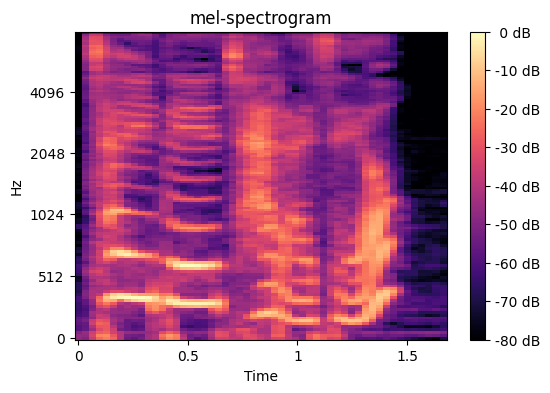

In [ ]:
#n_fft = 2048 # stft에서 short(frame) 한개의 크기
#win_length = 2048
#hop_length = 1024 # window 간 거리

n_mels = 128

plt.figure(figsize=(6, 4))
mel_spec = librosa.feature.melspectrogram(y=korean_wav, sr=rate, n_mels=n_mels)
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), sr=rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%2.0f dB')
plt.title("mel-spectrogram")
plt.show()

[Text(0.5, 1.0, 'mel spectrogram')]

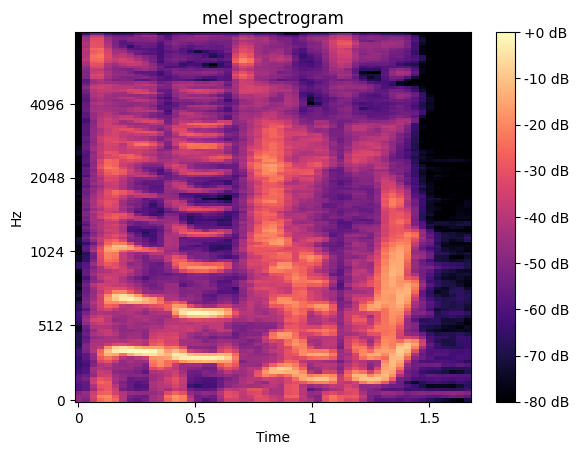

In [ ]:
fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(y=korean_wav, sr=rate, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=rate, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='mel spectrogram')

# male, female

## data load

In [5]:
male = "/content/male.wav"
female = "/content/female.wav"

male_wav, male_sr = librosa.load(male, sr=16000)
female_wav, female_sr = librosa.load(female, sr=16000)

In [ ]:
ipd.Audio(male_wav, rate=male_sr)

In [ ]:
ipd.Audio(female_wav, rate=female_sr)

## waveform

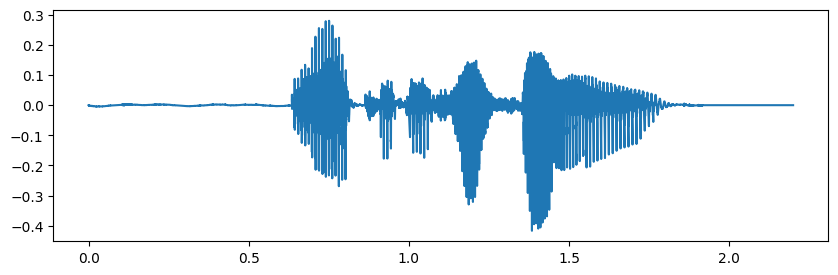

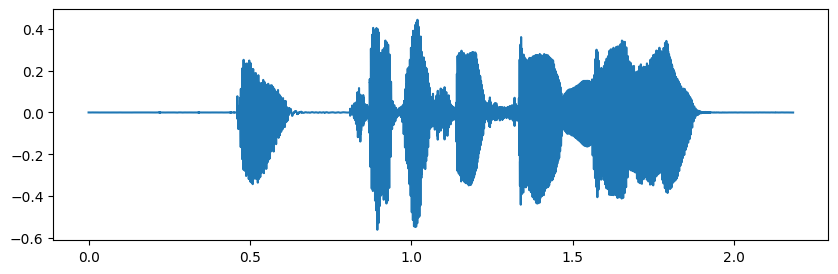

In [ ]:
def draw_waveform(audio, sr):
  time = np.linspace(0, len(audio)/sr, len(audio))
  plt.figure(figsize=(10, 3))
  plt.plot(time, audio)
  plt.show()

draw_waveform(male_wav, male_sr)
draw_waveform(female_wav, female_sr)

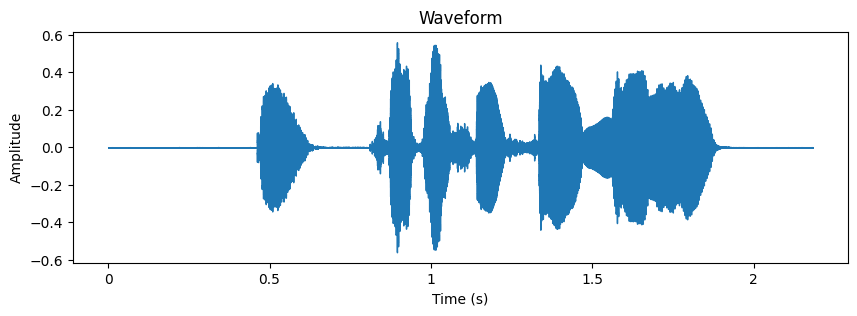

In [ ]:
# Plot the waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(female_wav, sr=female_sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## spectrum (fft)

#### numpy.fft.fftfreq을 이용해 축 그리는 방법


---


fftfreq(n, d)를 보면<br>
n은 window length로 n에 따라 fft한 신호를 자르거나 padding해서 늘릴 수 있다.<br>
d는 1/sampling rate<br>
linspace와 비슷하게 축을 만들어주는데 간단하게 핵심만 말하면<br>
전체 축의 원소? 개수는 n개이고 최대값은 sampling rate//2이다.<br>
그리고 -sampling rate//2 ~ sampling rate까지의 축이 생성된다.<br>
아래 코드에서 n = 35200, sampling rate = 16000라고 하면
결과값 frequency는 -8000~8000사이의 범위에서 35200개의 축 원소가 만들어짐.<br> => [0, ..., 8000, -8000 ..., -1]/(d x n)이 됨. (정확하진 않고 대략 저런식으로 만들어짐)<br>

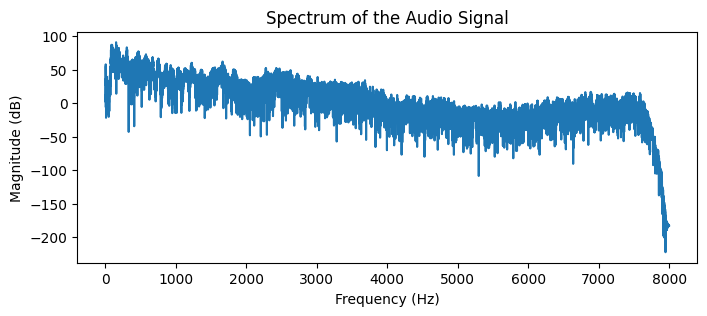

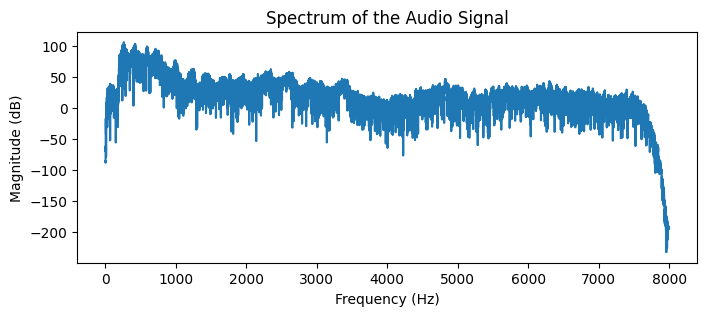

In [26]:
# 전체 신호에 대해 FFT
def draw_spectrum(audio, rate):
  # Compute the FFT
  fft_result = np.fft.fft(audio)
  magnitude_spectrum = np.abs(fft_result)

  # Create frequency axis
  frequency = np.fft.fftfreq(fft_result.size, d=1/rate)
  # Plot the spectrum
  plt.figure(figsize=(8, 3))
  plt.plot(frequency[:fft_result.size//2], 20 * np.log(magnitude_spectrum[:fft_result.size//2]))
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude (dB)')
  plt.title('Spectrum of the Audio Signal')
  plt.show()

draw_spectrum(male_wav, male_sr)
draw_spectrum(female_wav, female_sr)

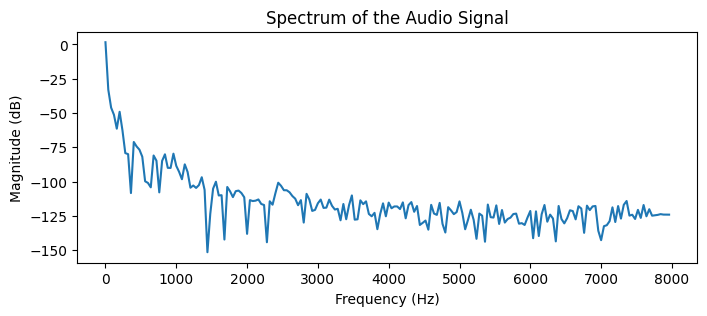

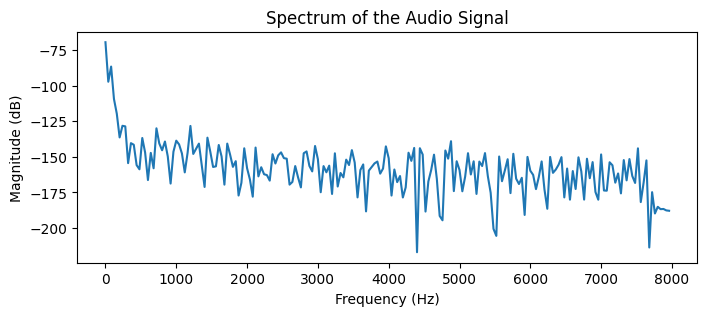

In [27]:
# 앞 25ms만 FFT
def draw_spectrum(audio, rate):
  # Compute the FFT
  fft_result = np.fft.fft(audio[:round(0.025*male_sr)])
  magnitude_spectrum = np.abs(fft_result)

  # Create frequency axis
  frequency = np.fft.fftfreq(fft_result.size, d=1/rate)
  # Plot the spectrum
  plt.figure(figsize=(8, 3))
  plt.plot(frequency[:fft_result.size//2], 20 * np.log(magnitude_spectrum[:fft_result.size//2]))
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude (dB)')
  plt.title('Spectrum of the Audio Signal')
  plt.show()

draw_spectrum(male_wav, male_sr)
draw_spectrum(female_wav, female_sr)

혹시 왜 전체 FFT와 25ms FFT의 mag 차이가 큰지 궁금하다면...<br>
**STFT의 관점에서 생각해보자.** <br>
- 신호 전체에 대한 FFT는 <U>전체 frame의 각 주파수 contribution들을 모두 더한걸</U> 나타내기 때문에 mag이 높을 수 밖에 없음.<br>
- 그러나 25ms는 FFT `한 frame`의 각 주파수 contribution들을 보여주기 때문에 당연히 상대적으로 많이 작다.

#### linspace 이용해 축 그리는 방법


---


numpy.fft.fftfreq은 꽤 간단하게 축을 만들어주지만 linspace는 계산을 해야함.<br>
위처럼 비슷한 축을 만들기 위해서는 똑같이 -8000 ~ 8000의 축을 만들어서 반 잘라써도 되지만, 아래 코드에선 0 ~ 8000사이의 범위에 35200//2개의 축 원소가 만들어지게 해야 함.<br>
따라서 linspace(0, rate//2, len(magnitude)//2)가 된다.

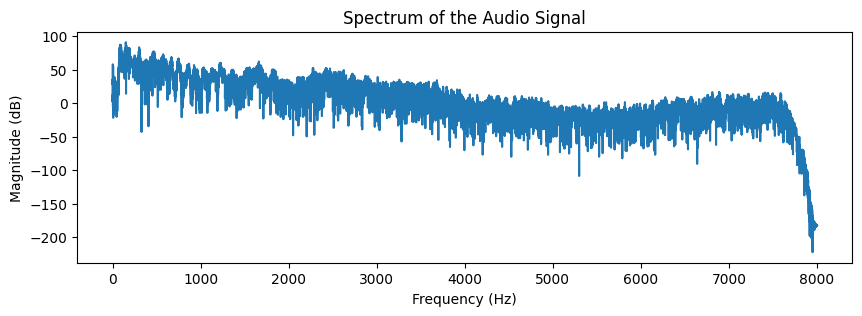

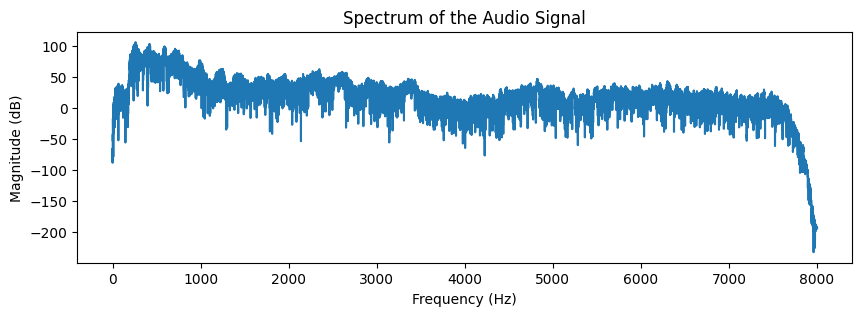

In [ ]:
def draw_spectrum(audio, rate):
  fft = np.fft.fft(audio)
  magnitude = np.abs(fft)# / max(np.abs(fft))

  f = np.linspace(0, rate//2, len(magnitude)//2)
  left_spectrum = magnitude[:len(magnitude)//2]

  plt.figure(figsize=(10,3))
  plt.plot(f, 20*np.log(left_spectrum))
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude (dB)')
  plt.title('Spectrum of the Audio Signal')
  plt.show

draw_spectrum(male_wav, male_sr)
draw_spectrum(female_wav, female_sr)
# 젊은 남성의 목소리의 기본 주파수는 100~130Hz
# 젊은 여성의 목소리의 기본 주파수는 200~260Hz

95.42573216299397 1.4866274191032942e-05


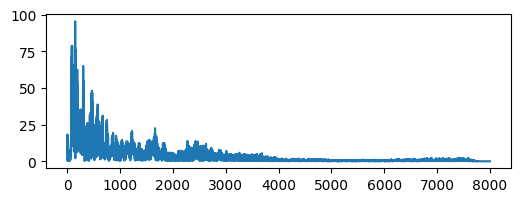

86.8538875952944 0.001396832884541984


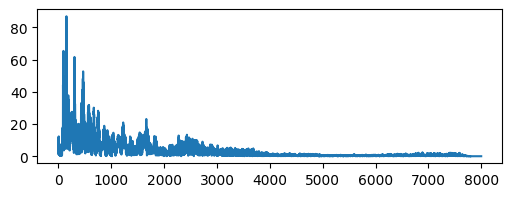

49.01389117946251 0.0023505617912886285


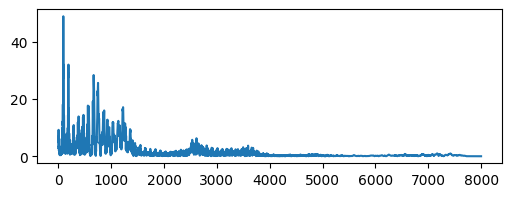

6.939626241864196 4.252617409436271e-06


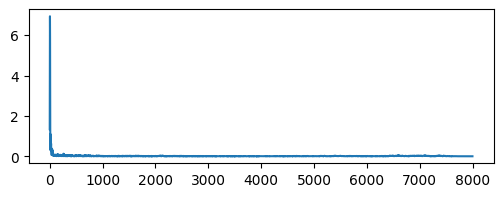

2.8765188896328446 0.00015249459346873009


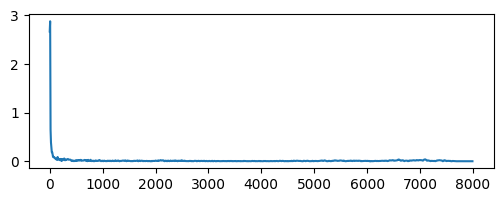

In [ ]:
def draw_spectrum(audio, rate):
  n_ffts = [35200, 24000, 15000, 7500, 2048]
  for n_fft in n_ffts:
  #n_fft = 24000
    fft = np.fft.fft(audio, n_fft)
    magnitude = np.abs(fft)
    print(magnitude.max(), magnitude.min())

    frequency = np.fft.fftfreq(n_fft, d=1/male_sr)

    plt.figure(figsize=(6,2))

    # 두개 번갈아가면서 확인해봐.
    #plt.plot(frequency[:n_fft//2], 20*np.log(magnitude[:n_fft//2]))
    plt.plot(frequency[:n_fft//2], magnitude[:n_fft//2])

    plt.show()

draw_spectrum(male_wav, male_sr)

# n_fft가 커질수록 주파수 해상도↑ 시간 해상도↓
# n_fft가 작아질수록 주파수 해상도↓ 시간 해상도↑
# 실제로 밑으로 내려갈수록 숱이 빠지는게 보인다.

# 근데 주파수 해상도가 낮아져도 어쨌든 원신호에서 샘플링하는건 같은데 왜 값 분포 자체가 달라지는지는 잘 모르겠다.
# 아래로 내려갈수록 y축을 보면 그래프가 전체적으로 밑으로 내려간다.
# 위에서도 설명했지만...
'''
STFT의 관점에서 생각해보자
- 신호 전체에 대한 FFT는 전체 frame의 각 주파수 contribution들을 모두 더한걸 나타내기 때문에 mag이 높을 수 밖에 없음.
- 그러나 일부 신호만 FFT한 것은 한 개의 frame의 각 주파수 contribution들을 보여주기 때문에 당연히 상대적으로 많이 작다.
'''

## draw spectrogram

### STFT 실습

In [ ]:
male_wav.shape

(35200,)

In [ ]:
# stft 수행
S = np.abs(librosa.stft(male_wav))
S.shape

(1025, 69)

<function matplotlib.pyplot.show(close=None, block=None)>

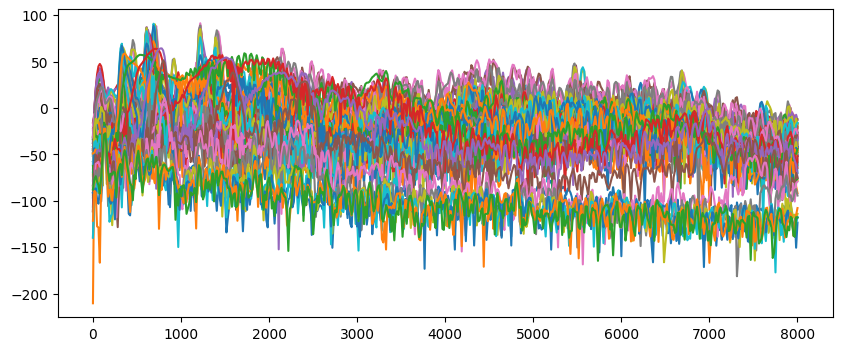

In [43]:
# 69개의 FFT 결과들을 (frame들) spectrum을 그려보기
f = np.linspace(0, male_sr//2, len(S)//2+1)
left_spectrum = S[:len(S)//2+1]

plt.figure(figsize=(10, 4))
plt.plot(f, 20 * np.log(left_spectrum))
plt.show

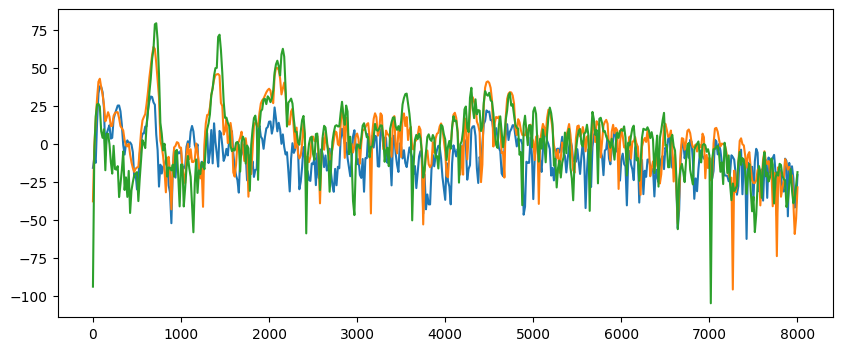

In [46]:
# 좀 더 보기 쉽게
f = np.linspace(0, male_sr//2, len(S)//2+1)
left_spectrum = S[:len(S)//2+1]

plt.figure(figsize=(10, 4))
plt.plot(f, 20 * np.log(left_spectrum[:, 3:6]))
plt.show()
# 확실히 분리되어 보인다. 녹색, 주황색, 파란색. 이렇게 각 phoneme의 주파수 분포를 확인할 수 있었다.

샘플링 주파수의 범위(0~16000)를 1025개(1+n_fft/2)로 나눠<br>
나눈 각 주파수 값(x축) 에 대응하는 mag값이 한 열이야.<br>
그리고 그게(한 열이) 하나의 frame의 stft한 결과값이야.<br>
<br>
그러면 한 frame안에 n_fft개의 sample이 있어(시간축)<br>
DFT의 특성상 DFT전과 후의 sample 개수가 같기 때문에 주파수축에서도 똑같이 n_fft개의 sample이 있어<br>
그래서 fft를 했더니 주파수값이 1+n_fft/2만큼 나왔어?<br>
한 frame당 모든 주파수의 mag값을 나타내<br>
모든 frame이 동일한 주파수의 mag이 달라. 시간에 따라 변하니까<br>
stft가 프레임들을 overlap해서 더하긴 하지만 결과값은 합치기 전에 모든 frame들이 열을 이루도록해서 출력됨<br>

### spectrogram 그리기

male
(1025, 69)
(1025, 69)


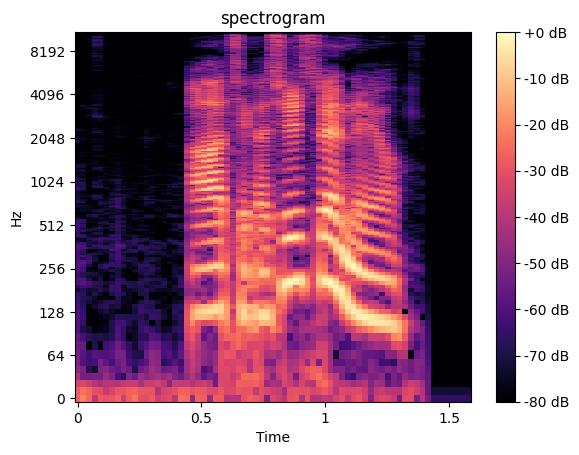

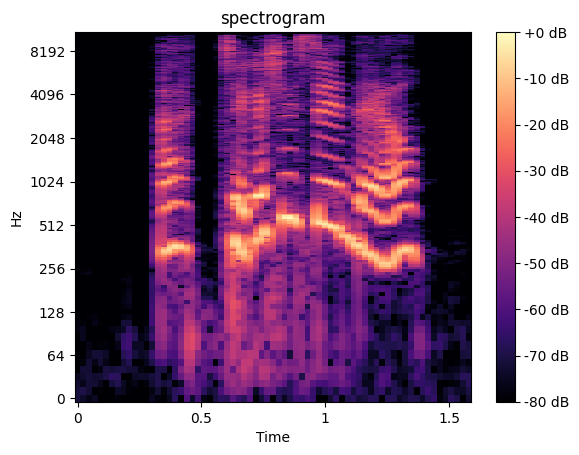

In [28]:
def draw_spectrogram(audio):
  S = np.abs(librosa.stft(audio))  # short time fourier transform
  fig, ax = plt.subplots()
  img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                                y_axis='log', x_axis='time', ax=ax)
  ax.set_title('spectrogram')
  fig.colorbar(img, ax=ax, format="%+2.0f dB")

print('male')
draw_spectrogram(male_wav)
draw_spectrogram(female_wav)

## mel spectrogram

### male

원래 신호(male_wav)와 sampling rate(male_sr)을 넣고 mel spectrogram을 구했을 때와 stft를 수행한 후(S) mel spectrogram을 구했을 때가 다르다.

하지만 이유를 모르겠다. librosa github 코드에선 같은 것 같은데... 더 공부가 필요!

--------------------------------------------------

<h3> => 이유를 찾았다. librosa.feature.melspectrogram 메소드에서 hyperparameter 중 power가 1이 아니라 2가 default였다. <h3>

이 power값이 그대로 _spectrogram 메소드로 들어가니까 제곱으로 뻥튀기 되어서 값이 다르게 되었던 것이다. <u>S값이 들어갔을 땐 이 power값이 쓰이지 않지만</u>
y, sr이 들어갔을 땐 이 power값이 쓰이기 때문에 <u>제곱을 해서 큰 값은 더 커지고 작은 값은 더 작아져서 대비가 커보였던 것 같다.</u>


(**실제로 S가 들어갔을 때보다 y, sr이 들어갔을 때의 S값이 살짝 더 작긴 하다.** 크지 않고 작은 이유는 log처리해서 1보다 작은 값들이라 제곱할수록 값이 더 작아져서 그런 듯)

In [6]:
S = np.abs(librosa.stft(male_wav))**2  # short time fourier transform
mc = librosa.feature.melspectrogram(S=S, sr=male_sr, n_mels=128)
mc, mc.shape

(array([[4.06280570e-02, 7.72984251e-02, 4.46492396e-02, ...,
         8.60149385e-07, 8.93121864e-07, 1.24572432e-06],
        [8.53182632e-04, 2.62093265e-04, 4.17390693e-05, ...,
         7.25633065e-09, 1.11809806e-08, 5.79679664e-08],
        [2.25857337e-04, 7.10944878e-05, 1.06751613e-05, ...,
         1.60781166e-08, 1.05673861e-08, 2.39332003e-08],
        ...,
        [9.49374410e-08, 2.49041733e-07, 1.30582225e-06, ...,
         2.40555700e-08, 3.13659889e-08, 2.02575485e-08],
        [6.91778297e-08, 1.00134130e-07, 1.81154363e-07, ...,
         9.90263871e-09, 1.23595685e-08, 1.11736931e-08],
        [4.46223591e-09, 4.93933339e-09, 7.03835612e-09, ...,
         9.05689468e-10, 1.06632114e-09, 1.02217701e-09]], dtype=float32),
 (128, 69))

In [ ]:
mel_spec = librosa.feature.melspectrogram(y=male_wav, sr=male_sr, n_mels=128)
mel_spec, mel_spec.shape

(array([[4.06280570e-02, 7.72984251e-02, 4.46492396e-02, ...,
         8.60149385e-07, 8.93121864e-07, 1.24572432e-06],
        [8.53182632e-04, 2.62093265e-04, 4.17390693e-05, ...,
         7.25633065e-09, 1.11809806e-08, 5.79679664e-08],
        [2.25857337e-04, 7.10944878e-05, 1.06751613e-05, ...,
         1.60781166e-08, 1.05673861e-08, 2.39332003e-08],
        ...,
        [9.49374410e-08, 2.49041733e-07, 1.30582225e-06, ...,
         2.40555700e-08, 3.13659889e-08, 2.02575485e-08],
        [6.91778297e-08, 1.00134130e-07, 1.81154363e-07, ...,
         9.90263871e-09, 1.23595685e-08, 1.11736931e-08],
        [4.46223591e-09, 4.93933339e-09, 7.03835612e-09, ...,
         9.05689468e-10, 1.06632114e-09, 1.02217701e-09]], dtype=float32),
 (128, 69))

[Text(0.5, 1.0, 'Male mel (power) spectrogram')]

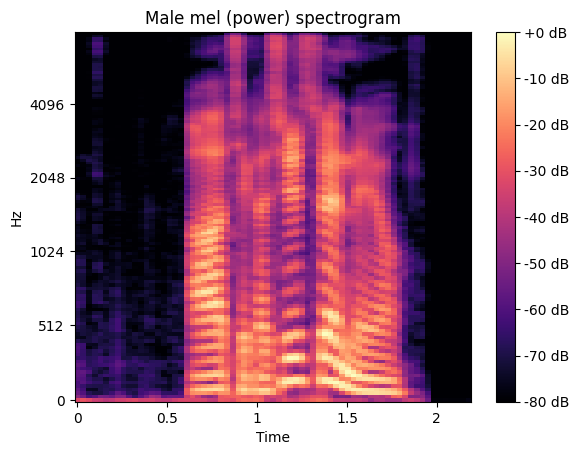

In [ ]:
fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(y=male_wav, sr=male_sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=male_sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Male mel (power) spectrogram')

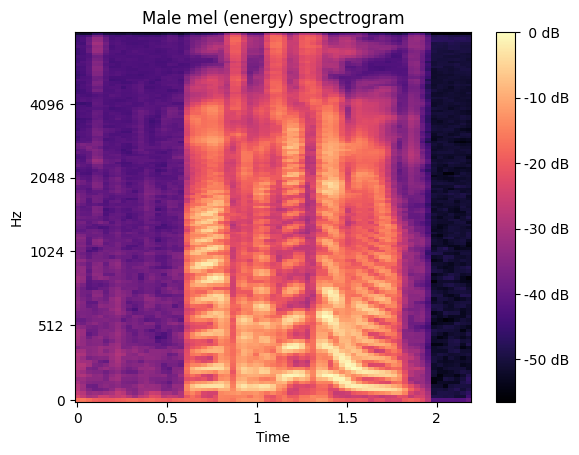

In [ ]:
S = np.abs(librosa.stft(male_wav))**2  # short time fourier transform
mel_spec = librosa.feature.melspectrogram(S=S, n_mels=128)
mel_db = librosa.power_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_db, sr=male_sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%2.0f dB')
plt.title("Male mel (energy) spectrogram")
plt.show()

### female

[Text(0.5, 1.0, 'Female mel spectrogram')]

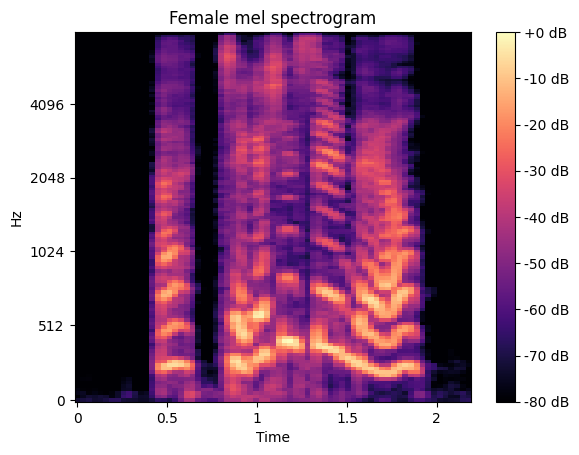

In [ ]:
fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(y=female_wav, sr=female_sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=female_sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Female mel spectrogram')

# MFCCs (Mel-Frequency Cepstral Coefficients)

mel spectrum을 DCT(Discrete Cosine Transform)로 처리하면 얻게 되는 coefficient

=> mel spectum을 log를 취한 후 inverse FFT를 적용한다.

---------------------

참고 : https://ratsgo.github.io/speechbook/docs/fe/mfcc#mfccs

liborsa를 사용한 분석

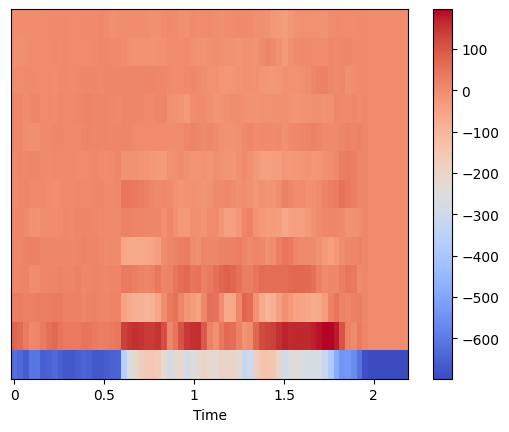

In [ ]:
mfccs = librosa.feature.mfcc(y=male_wav, sr=male_sr, n_mfcc=13)

img = librosa.display.specshow(mfccs, sr=male_sr, x_axis='time')
plt.colorbar(img)

In [ ]:
mfccs.shape

(13, 69)

python_speech_features를 사용한 분석

In [ ]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5872 sha256=8f817b35540425bbfcbf59a1c8fde61b08778280ae33943995ad800fff619c23
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


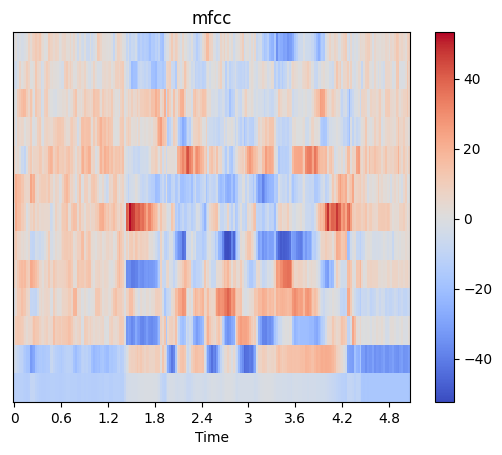

In [ ]:
from python_speech_features import mfcc
mf = mfcc(male_wav, male_sr, numcep = 13, nfilt = 26, nfft = 1024).T
#Transpose(전치)를 하는 이유는 python_speech_features에서 제공하는 mfcc 알고리즘이 모종의 이유로(?) 행, 열을 거꾸로 출력하기 때문이다.
"""
nfilt는 필터의 개수로 위 mel filter bank 그림에서 filter의 개수를 의미한다. default 26
nfft 는 STFT 계산 시 매 프레임의 길이를 의미한다. 25ms 단위로 STFT를 하기 위해 round(44100/40)의 결과인 1103을 nfft로 설정하였다. MFCC의 결과로 반환하는 열의 길이를 결정한다.
numcep은 cepstrum coefficients의 개수로 MFCC의 결과로 반환하게 되는 행의 길이이다. 보통 13개 또는 26개
nfilt보다 numcep이 작은 이유는 무엇일까?
앞 순서의 필터들이 뒷 순서의 필터들보다 더 낮은 주파수의 정보를 가지고 있고 더 낮은 주파수에 예민하게 반응하는 인간 인지 특성을 감안하면 모든 필터를 MFCC 생성에 활용하는 것이 아니라
앞 순서의 필터들 몇개만 MFCC 생성에 참고하게 되면 더욱 효율적인 특징 벡터 추출이 가능해진다. 통상적으로 numcep = nfilt/2로 설정하면 효과적으로 정보를 추출할 수 있다.
"""
librosa.display.specshow(mf, x_axis='time')
plt.colorbar()
plt.title('mfcc')
#plt.imshow(mf, cmap = "hot", interpolation = "nearest")
plt.show()

In [ ]:
mf.shape

(13, 219)

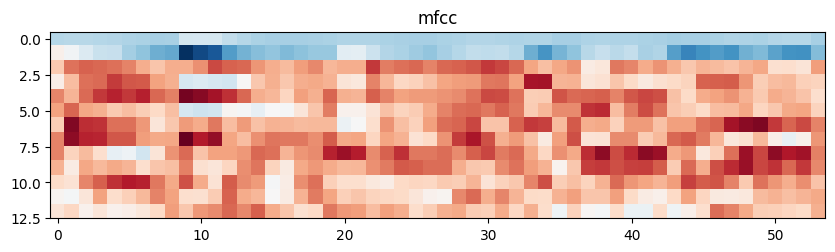

In [ ]:
from python_speech_features import mfcc, logfbank
mf = mfcc(male_wav[:len(male_wav)//4], male_sr, numcep = 13, nfilt = 26, nfft = 1024).T

#Transpose(전치)를 하는 이유는 python_speech_features에서 제공하는 mfcc 알고리즘이 모종의 이유로(?) 행, 열을 거꾸로 출력하기 때문이다.
"""
nfilt는 필터의 개수로 위 mel filter bank 그림에서 filter의 개수를 의미한다. default 26
nfft 는 STFT 계산 시 매 프레임의 길이를 의미한다. 25ms 단위로 STFT를 하기 위해 round(44100/40)의 결과인 1103을 nfft로 설정하였다. MFCC의 결과로 반환하는 열의 길이를 결정한다.
numcep은 cepstrum coefficients의 개수로 MFCC의 결과로 반환하게 되는 행의 길이이다. 보통 13개 또는 26개
nfilt보다 numcep이 작은 이유는 무엇일까?
앞 순서의 필터들이 뒷 순서의 필터들보다 더 낮은 주파수의 정보를 가지고 있고 더 낮은 주파수에 예민하게 반응하는 인간 인지 특성을 감안하면 모든 필터를 MFCC 생성에 활용하는 것이 아니라
앞 순서의 필터들 몇개만 MFCC 생성에 참고하게 되면 더욱 효율적인 특징 벡터 추출이 가능해진다. 통상적으로 numcep = nfilt/2로 설정하면 효과적으로 정보를 추출할 수 있다.
"""
plt.figure(figsize=(10, 5))
plt.title('mfcc')
plt.imshow(mf, cmap = "RdBu_r", interpolation = "nearest")
plt.show()

이렇게 imshow를 썼을 때 뒤집어 나오는 이유는 imshow()의 특성인걸로...<br>
사진은 픽셀값들을 행렬의 정의대로(맨 위 행이 0, 맨 왼쪽 열이 0) 저장해두고 있기 때문에 이렇게 나오는 듯...<br>
오히려 librosa의 specshow가 행렬의 정의대로 저장되어 있는 데이터를 상하반전을 시켜서 이미지 출력을 해주는 것 같다.<br><br>
**결론은 imshow가 Tensor 형태 그대로 이미지로 보여주는거고 specshow가 상하반전 시켜서 보여주는 것이다.**

In [ ]:
mf.shape

(13, 219)

# 추가 공부

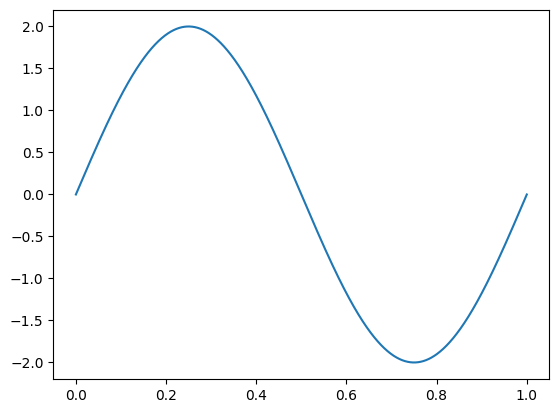

In [ ]:
import matplotlib.pyplot as plt
time = np.linspace(0, 1, 22050)
a = 2*np.sin(2*np.pi*1*time)
plt.plot(time, a)
plt.show()

np.linspace(start, stop, num) : start부터 stop까지 num수만큼 쪼갠다.<br>
np.arange(start, stop, step) : start부터 stop까지 step씩 건너 뛰면서 값을 가진다.

In [ ]:
a = np.linspace(0, 1, 22050)
b = np.arange(0, 1, 22050)